In order for the _differentiable physics_ approach to work, $P$ has to be differentiable. The _differentials_ in the form of a gradient will drive the learning process.

## Finding the inverse function of a parabola

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# X-Data
N = 200
X = np.random.random(N)

In [4]:
# Generate Y-Data
sign = (- np.ones((N, )))**np.random.randint(2, size=N)
Y = np.sqrt(X) * sign

In [5]:
# simple NN

act = tf.keras.layers.ReLU()
nn_sv = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation=act, input_shape=(1,)),
    tf.keras.layers.Dense(10, activation=act),
    tf.keras.layers.Dense(1, activation='linear')
])

In [6]:
# Loss function
loss_sv = tf.keras.losses.MeanSquaredError()
optimizer_sv = tf.keras.optimizers.Adam(learning_rate=0.001)
nn_sv.compile(optimizer=optimizer_sv, loss=loss_sv)

# Training
results_sv = nn_sv.fit(X, Y, epochs=5, batch_size=5, verbose=1)

Epoch 1/5
40/40 [==============================] - 1s 2ms/step - loss: 0.6798
Epoch 2/5
40/40 [==============================] - 0s 2ms/step - loss: 0.5874
Epoch 3/5
40/40 [==============================] - 0s 2ms/step - loss: 0.5601
Epoch 4/5
40/40 [==============================] - 0s 2ms/step - loss: 0.5482
Epoch 5/5
40/40 [==============================] - 0s 2ms/step - loss: 0.5445


7/7 [==============================] - 0s 2ms/step


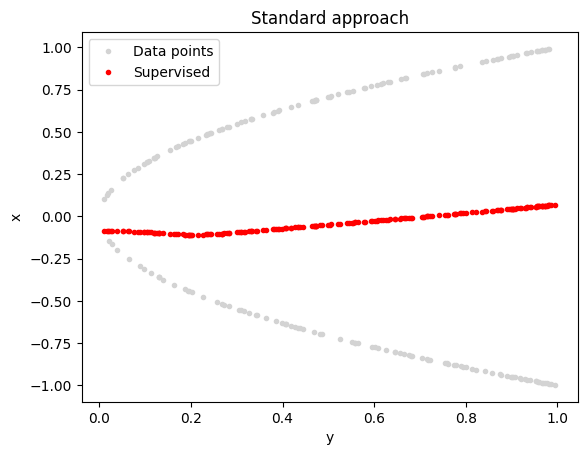

In [7]:
# Results

plt.plot(X, Y, '.', label='Data points', color="lightgray")
plt.plot(X, nn_sv.predict(X), '.', label='Supervised', color="red")
plt.xlabel('y')
plt.ylabel('x')
plt.title('Standard approach')
plt.legend()
plt.show()

## A differentiable physics approach

Now let's apply a differentiable physics approach to find $f$: we'll directly include our discretized model $P$ in the training.

There is no real data generation step; we only need to sample from the $[0, 1]$ interval. We'll simply keep the same $x$ locations used in the previous case, and a new instance of a NN with the same architecture as before `nn_dp`:

[reference](https://physicsbaseddeeplearning.org/intro-teaser.html)


In [8]:
# X-Data
# X = x, can directly re-use the X from above
# Y is evaluated on the fly.

# model
nn_dp = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation=act, input_shape=(1,)),
    tf.keras.layers.Dense(10, activation=act),
    tf.keras.layers.Dense(1, activation='linear')
])

In [9]:
# Loss
mse = tf.keras.losses.MeanSquaredError()
def loss_dp(y_true, y_pred):
  return mse(y_true, y_pred**2)

optimizer_dp = tf.keras.optimizers.Adam(learning_rate = 0.001)
nn_dp.compile(optimizer = optimizer_dp, loss = loss_dp)

In [10]:
# Training
results_dp = nn_dp.fit(X, X, epochs=5, batch_size=5, verbose=1)

Epoch 1/5
40/40 [==============================] - 2s 2ms/step - loss: 0.3103
Epoch 2/5
40/40 [==============================] - 0s 2ms/step - loss: 0.1147
Epoch 3/5
40/40 [==============================] - 0s 2ms/step - loss: 0.0034
Epoch 4/5
40/40 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 5/5
40/40 [==============================] - 0s 2ms/step - loss: 0.0016


7/7 [==============================] - 0s 3ms/step


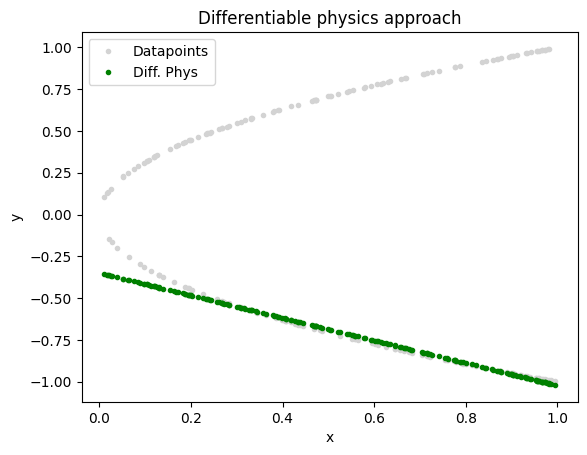

In [11]:
# Results
plt.plot(X, Y, '.', label='Datapoints', color='lightgray')
plt.plot(X, nn_dp.predict(X), '.', label='Diff. Phys', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Differentiable physics approach')
plt.legend()
plt.show()

1. From what I understand, in creating our model, we are constantly comparing the current predictions to the previous ones. This isn't about just using a solution that was calculated before. Rather, it's about being able to pinpoint the best prediction, which is usually somewhere close to what our system is currently predicting. This way, I believe they are trying to avoid unnecessary repetition of predictions that are already within the possible solution scope.

2. As far as I gather, the system can only represent one aspect of the curve at a time. This is because the predictions are being made by a deterministic function, which can only handle one mode at a time. What's intriguing about this is that the decision as to whether it's the top or bottom mode that is used is random, based on how the weights initialed in the beginning. I understand that in order to account for multiple modes, the neural network would have to be expanded to effectively capture the full distribution of the outputs and additional dimensions would need to be added to parametrize it.

3. I interpreted that the area with values close to zero is not quite accurate in the current model. To me, it looks like the network is basically learning a simple approximation for half of the parabola in this part. I believe this could be because of the limitations of the neural network - it's small and not deeply layered. Moreover, because sample points are distributed evenly along the x-axis, the network is biased towards larger y-values. These typically contribute more to the loss, which in turn causes the system to devote more of its resources to reducing errors in this area.

[reference](https://physicsbaseddeeplearning.org/intro-teaser.html)

------
As mentioned in the book, let's try to go beyond.
1. Let's create a network which can follow one arm of parabola properly instead of learning only the linear approximation.

In [14]:
# model
nn_dp_one_arm = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, activation=act, input_shape=(1,)),
    tf.keras.layers.Dense(50, activation=act),
    tf.keras.layers.Dense(50, activation=act),
    tf.keras.layers.Dense(1, activation='linear')
])

In [15]:
# Loss
def loss_dp_one_arm(y_true, y_pred):
  return mse(y_true, y_pred**2)

In [16]:
optimizer_sp = tf.keras.optimizers.Adam(learning_rate = 0.001)
nn_dp_one_arm.compile(optimizer = optimizer_sp, loss = loss_dp_one_arm)

In [17]:
# Training
results_sp = nn_dp_one_arm.fit(X, X, epochs=5, batch_size=5, verbose=1)

Epoch 1/5
40/40 [==============================] - 1s 2ms/step - loss: 0.1660
Epoch 2/5
40/40 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 3/5
40/40 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 4/5
40/40 [==============================] - 0s 2ms/step - loss: 0.0010
Epoch 5/5
40/40 [==============================] - 0s 2ms/step - loss: 6.6484e-04


7/7 [==============================] - 0s 2ms/step


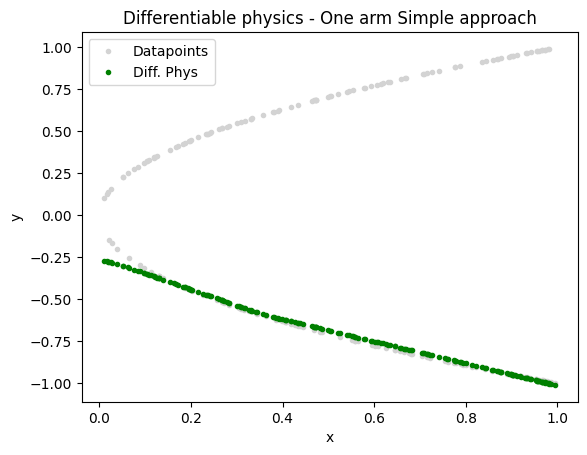

In [19]:
# Results
plt.plot(X, Y, '.', label='Datapoints', color='lightgray')
plt.plot(X, nn_dp_one_arm.predict(X), '.', label='Diff. Phys', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Differentiable physics - One arm Simple approach')
plt.legend()
plt.show()

# Script Complete